# Import Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error

# Data Preprocessing

In [3]:
dataTiket = {
    "Jarak (KM)" : [100, 150, 200, 250, 300, 350, 400, 450, 500, 550],
    "Musim Puncak" : ["Ya", "Tidak", "Ya", "Tidak", "Ya", "Tidak", "Ya", "Tidak", "Ya", "Tidak"],
    "Harga Tiket (Rp)" : [2300000, 2150000, 3835000, 3530000, 5370000, 5056000, 6900000, 6600000, 8440000, 7980000]
}


In [4]:
data = pd.DataFrame(dataTiket)
data

,Jarak (KM),Musim Puncak,Harga Tiket (Rp)
0,100,Ya,2300000
1,150,Tidak,2150000
2,200,Ya,3835000
3,250,Tidak,3530000
4,300,Ya,5370000
5,350,Tidak,5056000
6,400,Ya,6900000
7,450,Tidak,6600000
8,500,Ya,8440000
9,550,Tidak,7980000


# Label Encoding

In [5]:
data.head(5)

,Jarak (KM),Musim Puncak,Harga Tiket (Rp)
0,100,Ya,2300000
1,150,Tidak,2150000
2,200,Ya,3835000
3,250,Tidak,3530000
4,300,Ya,5370000


In [6]:
cat_columns = ['Musim Puncak']
for col in cat_columns:
    data[col] = data[col].astype('category').cat.codes

data.head(10)

,Jarak (KM),Musim Puncak,Harga Tiket (Rp)
0,100,1,2300000
1,150,0,2150000
2,200,1,3835000
3,250,0,3530000
4,300,1,5370000
5,350,0,5056000
6,400,1,6900000
7,450,0,6600000
8,500,1,8440000
9,550,0,7980000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Jarak (KM)        10 non-null     int64
 1   Musim Puncak      10 non-null     int8 
 2   Harga Tiket (Rp)  10 non-null     int64
dtypes: int64(2), int8(1)
memory usage: 302.0 bytes


# Split Data

In [8]:
X = data[['Jarak (KM)', 'Musim Puncak']]  # langsung gunakan 'Musim Puncak' di X
y = data['Harga Tiket (Rp)']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7, 2), (3, 2), (7,), (3,))

# Build Model

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

# Actual vs Prediction

In [12]:
pd.set_option('display.float_format', '{:.0f}'.format)

In [13]:
data = pd.DataFrame({'Actual':y_test, 'Prediction':y_pred})
data.head(10)

,Actual,Prediction
8,8440000,8383362
1,2150000,2002414
5,5056000,5028103


# Evaluasi Model

In [14]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r_squared)  

Mean Squared Error (MSE): 8589253765.358711
Root Mean Squared Error (RMSE): 92678.22702964657
R-squared: 0.9986999197064118


In [24]:
print(f'Koefisien: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'Accuracy score: {model.score(X_test, y_test)}')

Koefisien: [  15128.44827586 1085991.37931034]
Intercept: -266853.44827586133
Accuracy score: 0.9986999197064118


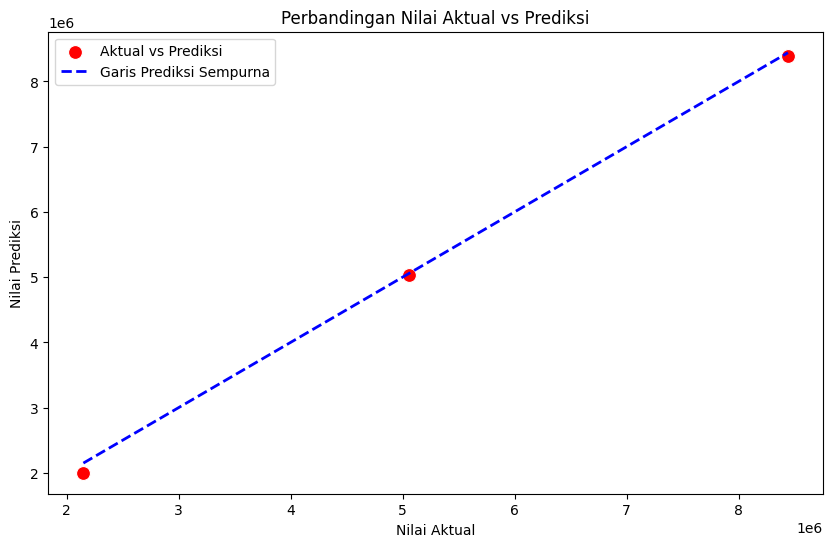

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='red', s=100, label='Aktual vs Prediksi')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--', linewidth=2, label='Garis Prediksi Sempurna')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Perbandingan Nilai Aktual vs Prediksi')
plt.legend()
plt.show()


In [18]:
X

,Jarak (KM),Musim Puncak
0,100,1
1,150,0
2,200,1
3,250,0
4,300,1
5,350,0
6,400,1
7,450,0
8,500,1
9,550,0


In [19]:
y

0    2300000
1    2150000
2    3835000
3    3530000
4    5370000
5    5056000
6    6900000
7    6600000
8    8440000
9    7980000
Name: Harga Tiket (Rp), dtype: int64